In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

## extractGNSSAHD

This script opens the output from the DynaNet National Adjustment
and extracts those points which have AHD heights.

Only points which have an AHD height can be used in the development
of AUSGeoid.

NOTE: Not all the points coming out of the adjustment will have an AHD
height, this script is will extract only those points which have an
ellipsoidal height and an AHD height along with it's uncertainty
if it has been provided.

In [83]:
!head ahd_gda2020_v1.3.dat -n 2

#Station            Const      Latitude      Longitude   H(Ortho) h(Ellipse)              X              Y              Z       SD(e)     SD(n)    SD(up)       AHD   AHD err
1000619             FFF   -20.316291533  118.576727769     5.0513     3.5189  -2862249.2343   5254813.7778  -2200568.5522      0.0028    0.0025    0.0062     5.039  -999.000


In [28]:
# import DynaNet file
ahd = pd.read_csv('ahd_gda2020_v1.3.dat',
                  delim_whitespace=True,
                  skiprows=1,
                  header=None,
                  names=['ID',
                         'CONST',
                         'LAT',
                         'LON',
                         'H_Ortho',
                         'h_Ellipse',
                         'X',
                         'Y',
                         'Z',
                         'SD_e',
                         'SD_n',
                         'SD_h',
                         'AHD',
                         'SD_AHD'])

In [740]:
ahd2 = np.genfromtxt('ahd_gda2020_v1.3.dat',
                     dtype='U20,U3,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8',
                     names=['ID','CONST','LAT','LON','H_Ortho','h_Ellipse','X','Y','Z','SD_e','SD_n','SD_h','AHD','SD_AHD'],
                     skip_header=True)

from numpy.lib.recfunctions import append_fields
ahd2 = append_fields(ahd2.copy(), 'POINT', np.arange(1, len(ahd2)+1).T, np.long)

In [190]:
ahd.head()

,ID,CONST,LAT,LON,H_Ortho,h_Ellipse,X,Y,Z,SD_e,SD_n,SD_h,AHD,SD_AHD,index2
0,1000619,FFF,-20.316292,118.576728,5.0513,3.5189,-2.862249e+06,5.254814e+06,-2.200569e+06,0.0028,0.0025,0.0062,5.039,-999.0,1
1,1002227,FFF,-22.126620,114.082379,13.2778,-0.7578,-2.412071e+06,5.396704e+06,-2.387407e+06,0.0022,0.0019,0.0072,13.275,-999.0,2
2,100375,FFF,-30.857534,128.034238,169.3684,149.5934,-3.376551e+06,4.316469e+06,-3.252421e+06,0.0013,0.0013,0.0034,169.369,-999.0,3
3,100384,FFF,-28.179691,114.510054,271.8558,250.0941,-2.334196e+06,5.119546e+06,-2.994191e+06,0.0013,0.0012,0.0037,271.861,-999.0,4
4,100387,FFF,-31.578329,117.846459,329.0848,303.0600,-2.540553e+06,4.809131e+06,-3.320848e+06,0.0012,0.0012,0.0030,329.085,-999.0,5


In [715]:
ahd.iloc[264]['h_Ellipse']

1243.5008

In [716]:
ahd2['h_Ellipse'][264]

1243.5008

In [30]:
print('No. pts in adjustment: ' + str(len(ahd)))
print('No. pts in adjustment with AHD ht included: '
      + str(len(ahd.loc[ahd.AHD != -999.000])))

No. pts in adjustment: 7642
No. pts in adjustment with AHD ht included: 7642


/nix/store/ji4z44qp4wc660894vnwqd4dyq95jyx7-python3-3.6.3-env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/nix/store/ji4z44qp4wc660894vnwqd4dyq95jyx7-python3-3.6.3-env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


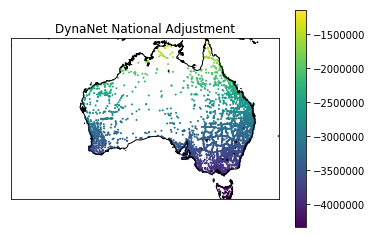

In [35]:
lats, lons = zip(*ahd[['LAT', 'LON']].values)
z = ahd['Z']

top = max(lats)
bottom = min(lats)
left = min(lons)
right = max(lons)
m = Basemap(projection='merc',
            resolution='l',
            lat_0=(top + bottom) / 2,
            lon_0=(left + right) / 2,
            area_thresh=0.1,
            llcrnrlon=left,
            llcrnrlat=bottom,
            urcrnrlon=right,
            urcrnrlat=top)

m.drawcoastlines()

lons, lats = m(lons, lats)

m.scatter(lons, lats, s=1, c=z)

plt.title("DynaNet National Adjustment")
plt.colorbar()

In [36]:
ahd['index2'] = pd.RangeIndex(start=1, stop=len(ahd)+1, step=1)

In [37]:
ahd.loc[ahd.AHD != -999.000][['index2',
                              'LAT',
                              'LON',
                              'h_Ellipse',
                              'SD_h',
                              'AHD',
                              'SD_AHD',
                              'ID']].to_csv('1_GNSSAHD.txt',
                                            sep=' ',
                                            header=False,
                                            index=False)

In [726]:
%load_ext autoreload
%autoreload 2
from utils import test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [737]:
# %i6,%f14.8,%f11.4,%f9.4,%f11.4,%f12.4,%3i,%s20
np.savetxt('1_GNSSAHD2.txt',
           ahd2.filled()[['POINT','LAT', 'LON', 'h_Ellipse', 'SD_h', 'AHD', 'SD_AHD', 'ID']],
           fmt='%7i%14.8f%14.8f%11.4f%9.4f%11.4f%12.4f   %-20s')

In [738]:
with open('1_GNSSAHD2.txt', 'r') as mine, open('tests/resources/1_GNSSAHD.txt', 'r') as theirs:
    my_lines = mine.readlines()
    their_lines = theirs.readlines()

test(my_lines, their_lines)

In [739]:
my_line = my_lines[264].replace('\n', '')
their_line = their_lines[264].replace('\n', '')

test(my_line, their_line)

## estimateAHDsigma

This script opens the output from extractGNSSAHD and estimate the
AHD uncertainties at collocated GNSS + AHD sites which have no AHD
uncertainty.

### COMPUTE SIGMA

1. Read in a GNSS+AHD point
2. Check if it has a AHD uncertainty. If it does not, that is, it has an
   uncertainty value of -999, then compute an uncertainty based on distance
   to nearest JP. The program calculates the closest junction point to each
  GNSS+AHD pt and the uncertainty is 12 rt k where k is distance.
3. If it already has an uncertainty, write the GNSS+AHD points with a AHD uncertainty to file
4. SD_NAHD = sqrt((SD_h\*\*2)+(SD_GNSSAHD\*\*2))
   That is - the SD of Nahd does not include gravity model uncertainty